# Project 3: Satellite Tracker 🛰️

## Objectives 
- Create a Python program to create two visualizations for satellite tracking
- Use online data sources like `Celestrak` to gather TLE data
- Create a 2D visualization of a satellite's ground track
- Create a polar coordinate plot of the satellite
- Utilize libraries such as `skyfield`, `numpy`, and `matplotlib`

## Conceptual Knowledge 📚
Before diving into the project, let's cover the following concepts.

### **Ground Track**:
The path traced by a satellite as it orbits the Earth when viewed from a fixed point on the Earth's surface. It is essentially the orbital projection of the satellite onto a 2D mapped surface. 

![https://www.researchgate.net/publication/289332946/figure/fig2/AS:332981928513541@1456400486968/Ground-track-green-and-border-of-coverage-region-red-for-a-constellation-of-2-Molniya.png](https://www.researchgate.net/publication/289332946/figure/fig2/AS:332981928513541@1456400486968/Ground-track-green-and-border-of-coverage-region-red-for-a-constellation-of-2-Molniya.png)

[Image Source](https://www.researchgate.net/figure/Ground-track-green-and-border-of-coverage-region-red-for-a-constellation-of-2-Molniya_fig2_289332946)

### **Azimuth and Elevation**:
In the context of satellite tracking, azimuth and elevation are two important parameters used to describe the position of a satellite relative to an observer on the Earth's surface.

- `Azimuth`: horizontal direction of an object in the sky (degrees)

- `Elevation`: represents the vertical angle of an object above the horizon as observed from the observer's location (degrees)

![https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy0e13nYZAvn28iVnAAQ3rkL5Mm_qxgH5yMFPMpN0UmQ&s](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy0e13nYZAvn28iVnAAQ3rkL5Mm_qxgH5yMFPMpN0UmQ&s)

[Image Source](https://www.celestis.com/resources/faq/what-are-the-azimuth-and-elevation-of-a-satellite/)

### **Checking for Passes**:
Checking for passes in satellite tracking involves determining when a satellite is visible from a specific location on Earth. You can detect when a satellite pass is occurring by monitoring the azimuth and elevation values. A satellite is considered visible if its elevation angle is above a certain threshold (for example: 5 degrees above the horizon).

### **Polar Visualizations**:
Polar visualizations use a polar coordinate system, with the observer's location at the center and azimuth (horizontal angle) and elevation (vertical angle) as the coordinates to plot satellite passes relative to the observer's geographic location on Earth.

![https://www.mathworks.com/help/examples/shared_nav_satcom/win64/ViewSatellitePositionsFromGNSSSensorExample_01.png](https://www.mathworks.com/help/examples/shared_nav_satcom/win64/ViewSatellitePositionsFromGNSSSensorExample_01.png)

[Image Source](https://www.mathworks.com/help/nav/ref/skyplot.html)

## Create a Ground Track Visualization using skyfield

### Step 1: Intialize Libraries

In [132]:
import ephem
import matplotlib.pyplot as plt
from datetime import datetime
from skyfield.api import utc

### Step 2: Define TLE Data

In [129]:
station_data = api.load.tle('https://celestrak.com/NORAD/elements/stations.txt')
iss = station_data['ISS (ZARYA)']
print(iss)

ISS (ZARYA) catalog #25544 epoch 2024-03-22 01:56:02 UTC


### Step 3: Define Time Range

In [162]:
## Change to your specified time range. Current: 2 hours
minutes = range(60 * 2)
time_range = time_scale.utc(2024, 3, 21, 2, minutes)

In [163]:
altitudes = []
azimuths = []

for t in time_range:
    # Calculate satellite position at each time step
    port_hedland = api.Topos(latitude='20.3123 S', longitude='118.64498 E')
    orbit = (iss - port_hedland).at(t)
    altitude, azimuth, distance = orbit.altaz()
    
    # Append the altitude and azimuth values to the lists
    altitudes.append(altitude.degrees)
    azimuths.append(azimuth.degrees)

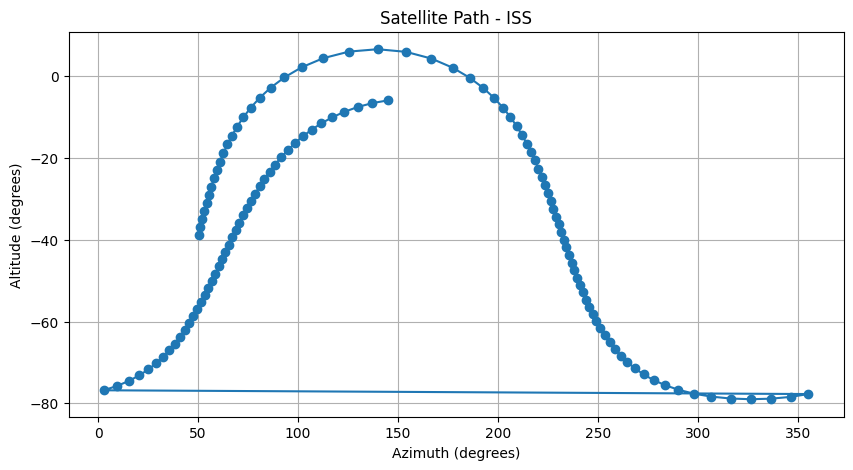

In [164]:
plt.figure(figsize=(10, 5))
plt.plot(azimuths, altitudes, marker='o', linestyle='-')
plt.title("Satellite Path - ISS")
plt.xlabel("Azimuth (degrees)")
plt.ylabel("Altitude (degrees)")
plt.grid(True)
plt.show()

## Create a Polar Plot of Passes using skyfield

### Step 1: Initialize Libraries

In [102]:
from skyfield import api
from pytz import timezone
import numpy as np

## Change to your time zone
time_zone = timezone('US/Pacific')

### Step 2: Access TLE Files
This time around we will be accessing TLE files using the skyfield API library to get access to online data from a satellite TLE provider called Celestrak

In [71]:
station_data = api.load.tle('https://celestrak.com/NORAD/elements/stations.txt')
iss = station_data['ISS (ZARYA)']
print(iss)

ISS (ZARYA) catalog #25544 epoch 2024-03-22 01:56:02 UTC


### Step 3: Declare Time Range of Pass
The following code specifies our time range to be in between two days of 3/21/2024.

In [85]:
# Current time range (in minutes) = 2 days. Change to your values
minutes = range(60 * 24 * 2)
time_scale = api.load.timescale()

## Change to your specified time range
time_range = time_scale.utc(2024, 3, 21, 2, minutes)

### Step 4: Obtaining Relative Orbital Details
The code below calculates the orbital position, altitude, azimuth, and distance of the satellite relative to the location of Port Hedland using the `altaz` function

In [91]:
# Change to your specified geocoordinates. Current geocoordinates = Port Hedland in Australia 
port_hedland = api.Topos(latitude='20.3123 S', longitude='118.64498 E')
orbit = (iss - port_hedland).at(time_range)
altitude, azimuth, distance = orbit.altaz()
print(f"Altitudes: {altitude}")
print(f"Azimuth: {azimuth}")
print(f"Distance: {distance}")

Altitudes: 2880 values from -05deg 58' 47.9" to -02deg 15' 18.7"
Azimuth: 2880 values from 144deg 58' 45.2" to 167deg 30' 31.0"
Distance: [2.09431951e-05 2.15609662e-05 2.24692234e-05 ... 2.00617786e-05
 1.87118443e-05 1.76646330e-05] au


### Step 5: Checking for Visible Pass
These lines of code are used to identify the indices where the satellite is visible (`indicies`) and where its visibility status changes (`boundaries`) based on its altitude values.

In [92]:
visible_pass = altitude.degrees > 0
indicies, = visible_pass.nonzero()
boundaries, = np.diff(visible_pass).nonzero()

### Step 6: Reshaping data 
This code snippet reorganizes our data to include pairs. For example: 
`[93, 100]` where... 

`93` = starting index of a time frame where the satellite becomes visible

`100` = ending index of a time frame where the satellite becomes invisible

In [97]:
boundaries = boundaries[0: -1]
passes = boundaries.reshape(len(boundaries) // 2, 2)
print(passes)

[[  93  100]
 [ 188  199]
 [ 288  291]
 [ 990 1000]
 [1087 1097]
 [1486 1491]
 [1581 1591]
 [1679 1686]]


### Step 7: Getting the Rise and Set Time 

In [104]:
# Set this value to any index from 0 to len(boundaries)! This represents the pass we want to observe from our list of collected passes
pass_to_observe = 0
specific_pass = passes[pass_to_observe]
rise, set = specific_pass
print(f'ISS Rises at {time_range[0].astimezone(time_zone)}')
print(f'ISS Sets at {time_range[1].astimezone(time_zone)}')

ISS Rises at 2024-03-20 19:00:00-07:00
ISS Sets at 2024-03-20 19:01:00-07:00


### Step 8: Visualizing the Polar Plot

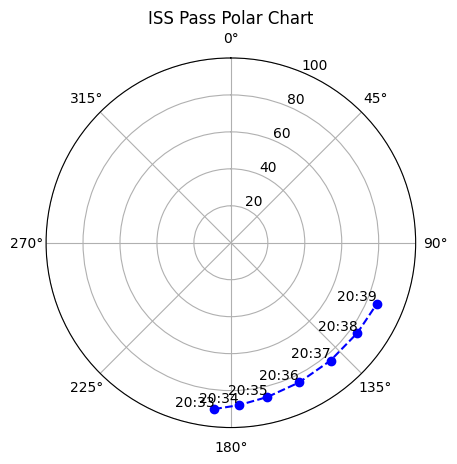

In [117]:
ax = plt.subplot(111, projection='polar')
plt.title("ISS Pass Polar Chart")
ax.set_rlim([0, 100])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

θ = az.radians
r = 90 - alt.degrees
ax.plot(θ[rise:set], r[rise:set], 'bo--')

for k in range(rise, set):
    text = time_range[k].astimezone(time_zone).strftime('%H:%M')
    ax.text(θ[k], r[k], text, ha='right', va='bottom')